<a href="https://colab.research.google.com/github/Santiago-Quinteros/Bayesian_classifier_TP/blob/main/TP_bayesian_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
def generate_gaussian_multivariate(M, N, theta, sigma_squared, pi1):

    # Generate M random numbers between 0 and 1
    random_numbers = np.random.rand(M)

    # Determine mean vector based on probability pi1 for each realization
    true_epsilon=  [1 if p < pi1 else 0 for p in random_numbers]

    mean_vectors = [np.array(theta) if p < pi1 else np.zeros(N) for p in random_numbers]

    covariance_matrix = sigma_squared * np.identity(N)

    # Generate M realizations of N-dimensional Gaussian vector
    samples = np.array([np.random.multivariate_normal(mean, covariance_matrix) for mean in mean_vectors])

    return samples,true_epsilon

In [ ]:
# Example usage:
M = 100
N = 2
theta = [4, 4]
sigma_squared = 2.0
pi1 = 0.8

# Generate the array of M realizations of X
result,epsilon = generate_gaussian_multivariate(M, N, theta, sigma_squared, pi1)

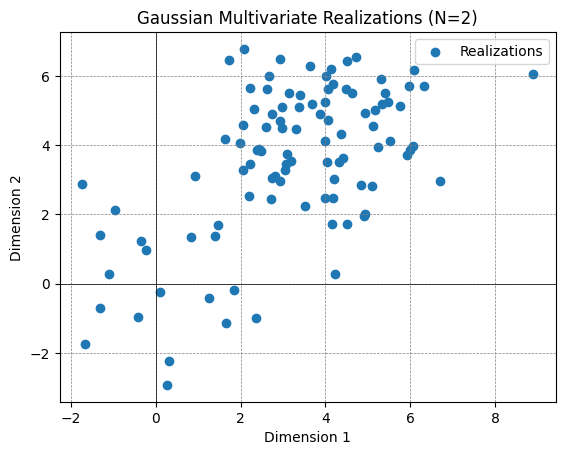

In [ ]:
# Plot the realizations
plt.scatter(result[:, 0], result[:, 1], marker='o', label='Realizations')
plt.title('Gaussian Multivariate Realizations (N=2)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

#Question 2

In [ ]:
def MPE_classifier(samples, theta, pi1, sigma_squared):
  binary_vector = np.array([1 if (np.dot(x.T,theta)> sigma_squared*np.log((1-pi1)/pi1)+ (np.linalg.norm(theta)**2) /2) else 0 for x in samples])
  return binary_vector

In [ ]:
M=10000
N=2
sigma_squared = 1.0
pi1 = 0.2

A=np.arange(1, 11)
theta_0 = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
theta_multiple_A = A[:, np.newaxis] * theta_0 # Theta array for each A value

In [ ]:
error_rates_MPE = np.zeros_like(A, dtype=float)
for i in range(np.shape(A)[0]):
  X,true_epsilon = generate_gaussian_multivariate(M, N, theta_multiple_A[i], sigma_squared, pi1)
  error_rates_MPE[i] = np.count_nonzero(MPE_classifier(X,theta_multiple_A[i],pi1,sigma_squared)- true_epsilon)/np.shape(true_epsilon)[0]
  print("A =",A[i],"   error rate=","{:.2e}".format(error_rates_MPE[i])) # Display results

A = 1    error rate= 1.86e-01
A = 2    error rate= 1.13e-01
A = 3    error rate= 4.96e-02
A = 4    error rate= 1.79e-02
A = 5    error rate= 4.60e-03
A = 6    error rate= 1.30e-03
A = 7    error rate= 2.00e-04
A = 8    error rate= 0.00e+00
A = 9    error rate= 0.00e+00
A = 10    error rate= 0.00e+00


#Question 3

In [ ]:
def NP_classifier(samples, theta, sigma_squared,gamma):
  binary_vector = np.array([1 if (np.dot(x.T,theta)> np.sqrt(sigma_squared)*np.linalg.norm(theta)*norm.ppf(1-gamma)) else 0 for x in samples])
  return binary_vector

In [ ]:
gamma= 10**(-3)

In [ ]:
error_rates_NP = np.zeros_like(A, dtype=float)
for i in range(np.shape(A)[0]):
  X,true_epsilon = generate_gaussian_multivariate(M, N, theta_multiple_A[i], sigma_squared, pi1)
  error_rates_NP[i]= np.count_nonzero(NP_classifier(X,theta_multiple_A[i],sigma_squared,gamma)- true_epsilon)/np.shape(true_epsilon)[0]
  print("A =",A[i],"   error rate=","{:.2e}".format(error_rates_NP[i])) # Display results


A = 1    error rate= 1.99e-01
A = 2    error rate= 1.74e-01
A = 3    error rate= 1.03e-01
A = 4    error rate= 3.47e-02
A = 5    error rate= 6.70e-03
A = 6    error rate= 1.40e-03
A = 7    error rate= 6.00e-04
A = 8    error rate= 6.00e-04
A = 9    error rate= 1.20e-03
A = 10    error rate= 9.00e-04


#Question 4

In [ ]:
def MPE_probability_of_error(theta, pi1, sigma_squared):
  rho=np.linalg.norm(theta)/np.sqrt(sigma_squared)
  pe_MPE=(1-pi1)*(1-norm.cdf((1/rho)*np.log((1-pi1)/pi1)+rho/2))+pi1*norm.cdf((1/rho)*np.log((1-pi1)/pi1)-rho/2)
  return pe_MPE

In [ ]:
def NP_probability_of_error(theta, pi1, sigma_squared):
  pe_NP = (1-pi1)*gamma + pi1*norm.cdf(norm.ppf(1-gamma)-np.linalg.norm(theta)/np.sqrt(sigma_squared))
  return pe_NP

In [ ]:
probability_of_errors = np.zeros((np.shape(A)[0],2))
for i in range(np.shape(A)[0]):
  probability_of_errors[i, 0] = MPE_probability_of_error(theta_multiple_A[i], pi1, sigma_squared)
  probability_of_errors[i, 1] = NP_probability_of_error(theta_multiple_A[i], pi1, sigma_squared)
  print("Probability of error the tests. MPE: ", probability_of_errors[i, 0],",NP:", probability_of_errors[i, 1])

Probability of error the tests. MPE:  0.1861562268083154 ,NP: 0.19714030631886867
Probability of error the tests. MPE:  0.11206652245619633 ,NP: 0.17323891742033995
Probability of error the tests. MPE:  0.04983199853757565 ,NP: 0.10798973875799486
Probability of error the tests. MPE:  0.01740318087459089 ,NP: 0.037094503545003765
Probability of error the tests. MPE:  0.004816106025878749 ,NP: 0.00641631306129947
Probability of error the tests. MPE:  0.001055718099250998 ,NP: 0.001161697490429099
Probability of error the tests. MPE:  0.0001829200237093725 ,NP: 0.0008092384924455869
Probability of error the tests. MPE:  2.49960318024048e-05 ,NP: 0.0008000911843475565
Probability of error the tests. MPE:  2.6886528603556555e-06 ,NP: 0.0008000003425905213
Probability of error the tests. MPE:  2.272756090200603e-07 ,NP: 0.000800000000485448


#Question 5

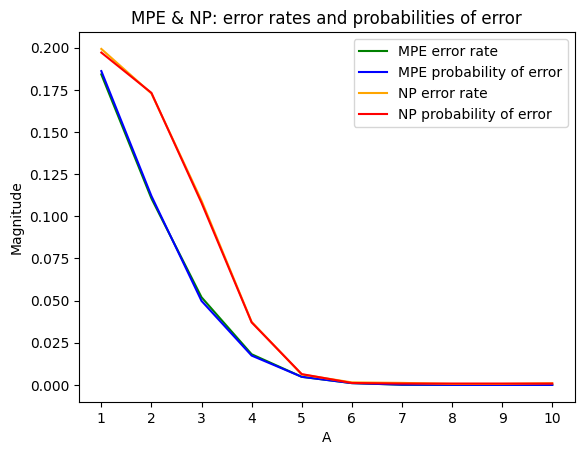

In [ ]:
# Plotting MPE
plt.plot(A, error_rates_MPE, color='g', label='MPE error rate')
plt.plot(A, probability_of_errors[:,0], color='b', label='MPE probability of error')

# Plotting NP
plt.plot(A, error_rates_NP, color='orange', label='NP error rate')
plt.plot(A, probability_of_errors[:,1], color='r', label='NP probability of error')


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("A")
plt.ylabel("Magnitude")
plt.xticks(A, A)
plt.title("MPE & NP: error rates and probabilities of error")
plt.legend()
plt.show()

In [ ]:
for a in range(1,11):
  inequality_value = 1 - norm.cdf(a/2) <= 0.5*(gamma + norm.cdf(norm.ppf(1-gamma)-a))
  print(f"For A = {a}, the inequality is {inequality_value}.")

For A = 1, the inequality is True.
For A = 2, the inequality is True.
For A = 3, the inequality is True.
For A = 4, the inequality is True.
For A = 5, the inequality is True.
For A = 6, the inequality is True.
For A = 7, the inequality is True.
For A = 8, the inequality is True.
For A = 9, the inequality is True.
For A = 10, the inequality is True.


# Question 6

The plot produced indicates that MPE test performs better than the Neyman-Pearson test. This seems to be due to that while the MPE error rate converges to 0, the NP error rate converges to the order of gamma, the same behaviour applies for the probability of error of both tests. The reason behind this is that the NP test garantees a type II error (misdetection) lower than gamma  (the level of the test). In contrast, the MPE test provides the minimum probability of error as its name says.